# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

Take a quick look at the csv files. How are they named? What kind of information do they hold? Will they help us make this graph?

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
peak = pd.read_csv('states1.csv')
print(peak.head())

   Unnamed: 0                 State  TotalPop Hispanic   White   Black Native  \
0           0              Colorado   5278906   20.78%  69.90%   3.55%  0.57%   
1           1           Connecticut   3593222   15.60%  67.68%  10.35%  0.13%   
2           2              Delaware    926454    8.82%  64.63%  20.74%  0.26%   
3           3  District of Columbia    647484    9.17%  33.10%  51.78%  0.20%   
4           4               Florida  19645772   21.34%  59.08%  15.17%  0.21%   

   Asian Pacific       Income           GenderPop  
0  2.66%     NaN  $64,657.80    2648667M_2630239F  
1  4.02%   0.02%  $76,146.56    1751607M_1841615F  
2  3.27%     NaN  $61,827.98      448413M_478041F  
3  3.38%   0.03%  $75,466.36      306674M_340810F  
4  2.28%   0.05%  $50,690.19   9600009M_10045763F  


2. Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [8]:
import glob
files = glob.glob('states*.csv')
df_list = []
for afile in files:
  data = pd.read_csv(afile)
  df_list.append(data)
states = pd.concat(df_list)

3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [10]:
print(states.columns, states.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object') Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [12]:
print(states.head(), states.info())

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 5
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  60 non-null     int64 
 1   State       60 non-null     object
 2   TotalPop    60 non-null     int64 
 3   Hispanic    60 non-null     object
 4   White       60 non-null     object
 5   Black       60 non-null     object
 6   Native      60 non-null     object
 7   Asian       60 non-null     object
 8   Pacific     55 non-null     object
 9   Income      60 non-null     object
 10  GenderPop   60 non-null     object
dtypes: int64(2), object(9)
memory usage: 5.6+ KB
   Unnamed: 0           State  TotalPop Hispanic   White   Black Native  \
0           0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%   
1           1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%   
2           2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%   
3           3       Tennessee   6

## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [15]:
states['Income'] = states['Income'].str.replace('$', '')
states['Income'] = states['Income'].str.replace(',', '')

6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

In [17]:
gender_pop = states['GenderPop'].str.split('_', expand = True)
print(gender_pop) ## only 60 rows and curious if all rows had data. 

           0          1
0    510388M    543273F
1   2322409M   2455167F
2    423477M    419713F
3   3167756M   3331859F
4  13171316M  13367298F
5   1459229M   1444150F
0   1459229M   1444150F
1    308573M    318031F
2   4060948M   4195682F
3   3487725M   3497739F
4    913631M    937789F
5   2851385M   2890732F
0   2872643M          F
1   3249650M   3455936F
2   4861973M   5038598F
3   2692166M   2727005F
4   1451723M   1536358F
5   2964003M   3081445F
0   2964003M   3081445F
1    510163M          F
2    929606M    939759F
3   1407735M   1390901F
4    653484M    670717F
5   4343027M   4561386F
0   5662893M   5913084F
1   1906944M   1942789F
2   1948453M   1990780F
3   6245344M   6534215F
4   1713860M   1869213F
5    510388M    543273F
0   4343027M   4561386F
1   1032414M   1051703F
2   9541801M  10131373F
3   4795408M   5049925F
4    367963M    353677F
5   5662893M   5913084F
0   4883331M   5123362F
1    709871M    696428F
2    810464M    806083F
3   6316899M   6556862F
4   3235263M   3

7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [19]:
states['Men'] = gender_pop[0].str.replace('M', '')
states['Women'] = gender_pop[1].str.replace('F','')
states = states[['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific', 'Income', 'Men', 'Women']]
states['Men'] = pd.to_numeric(states['Men'], errors = 'coerce')
states['Women'] = pd.to_numeric(states['Women'], errors = 'coerce')
states['Income'] = pd.to_numeric(states['Income'], errors = 'coerce')
print(states.head(), states.info())

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 5
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     60 non-null     object 
 1   TotalPop  60 non-null     int64  
 2   Hispanic  60 non-null     object 
 3   White     60 non-null     object 
 4   Black     60 non-null     object 
 5   Native    60 non-null     object 
 6   Asian     60 non-null     object 
 7   Pacific   55 non-null     object 
 8   Income    60 non-null     float64
 9   Men       60 non-null     int64  
 10  Women     57 non-null     float64
dtypes: float64(2), int64(2), object(7)
memory usage: 5.6+ KB
            State  TotalPop Hispanic   White   Black Native  Asian Pacific  \
0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%  3.25%   0.04%   
1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%  1.25%   0.05%   
2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%  1.02%   0.04%   
3       Tennessee   64

8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!

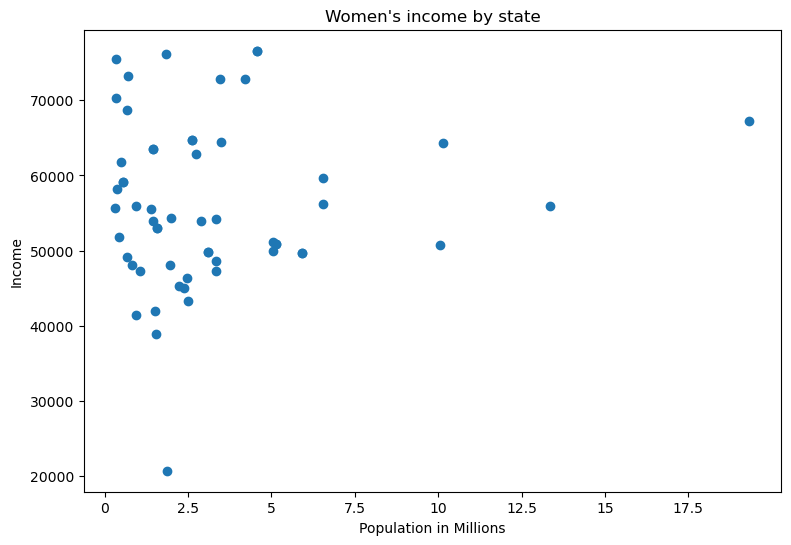

<Figure size 640x480 with 0 Axes>

In [21]:
plt.figure(figsize = [9, 6])
plt.scatter(states['Women'], states['Income'])
plt.title('Women\'s income by state')
plt.xlabel('Population in Millions')
plt.ylabel('Income')
plt.xticks(
    [0, 2500000, 5000000, 7500000, 10000000, 12500000, 15000000, 17500000], 
    labels = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5]
)
plt.show()
plt.clf()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

In [23]:
print(states[['State', 'Women']])

                  State       Women
0          Rhode Island    543273.0
1        South Carolina   2455167.0
2          South Dakota    419713.0
3             Tennessee   3331859.0
4                 Texas  13367298.0
5                  Utah   1444150.0
0                  Utah   1444150.0
1               Vermont    318031.0
2              Virginia   4195682.0
3            Washington   3497739.0
4         West Virginia    937789.0
5             Wisconsin   2890732.0
0              Maryland         NaN
1         Massachusetts   3455936.0
2              Michigan   5038598.0
3             Minnesota   2727005.0
4           Mississippi   1536358.0
5              Missouri   3081445.0
0              Missouri   3081445.0
1               Montana         NaN
2              Nebraska    939759.0
3                Nevada   1390901.0
4         New Hampshire    670717.0
5            New Jersey   4561386.0
0                  Ohio   5913084.0
1              Oklahoma   1942789.0
2                Oregon   19

We can fill in those nans by using pandas' .fillna() function.

You have the TotalPop per state, and you have the Men per state. As an estimate for the nan values in the Women column, you could use the TotalPop of that state minus the Men for that state.

Print out the Women column after filling the nan values to see if it worked!

In [25]:
states['Women'] = states['Women'].fillna(states['TotalPop'] - states['Men'])
print(states.head())

            State  TotalPop Hispanic   White   Black Native  Asian Pacific  \
0    Rhode Island   1053661   13.36%  74.33%   5.68%  0.35%  3.25%   0.04%   
1  South Carolina   4777576    5.06%  62.89%  28.75%  0.29%  1.25%   0.05%   
2    South Dakota    843190    3.24%  82.50%   1.42%  9.42%  1.02%   0.04%   
3       Tennessee   6499615    4.72%  73.49%  18.28%  0.23%  1.41%   0.04%   
4           Texas  26538614   38.05%  44.69%  11.65%  0.26%  3.67%   0.07%   

     Income       Men       Women  
0  59125.27    510388    543273.0  
1  46296.81   2322409   2455167.0  
2  51805.41    423477    419713.0  
3  47328.08   3167756   3331859.0  
4  55874.52  13171316  13367298.0  


10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [27]:
print(states.duplicated())

0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5    False
0    False
1    False
2    False
3    False
4    False
5     True
0     True
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5    False
0     True
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool


11. Drop those duplicates using the `.drop_duplicates()` function.

In [29]:
states = states.drop_duplicates()
print(states.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 4
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     51 non-null     object 
 1   TotalPop  51 non-null     int64  
 2   Hispanic  51 non-null     object 
 3   White     51 non-null     object 
 4   Black     51 non-null     object 
 5   Native    51 non-null     object 
 6   Asian     51 non-null     object 
 7   Pacific   47 non-null     object 
 8   Income    51 non-null     float64
 9   Men       51 non-null     int64  
 10  Women     51 non-null     float64
dtypes: float64(2), int64(2), object(7)
memory usage: 4.8+ KB
None


12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

In [31]:
import statsmodels.api as sm
model = sm.OLS.from_formula('Income ~ Women', states)
results = model.fit()
print(results.params)

Intercept    54696.706969
Women            0.000385
dtype: float64


/var/folders/30/lzj3_85d6s1b6602f906tzq00000gn/T/ipykernel_15507/3042846197.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1] * results.predict(states['Women']) + results.params[0],
/var/folders/30/lzj3_85d6s1b6602f906tzq00000gn/T/ipykernel_15507/3042846197.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  results.params[1] * results.predict(states['Women']) + results.params[0],


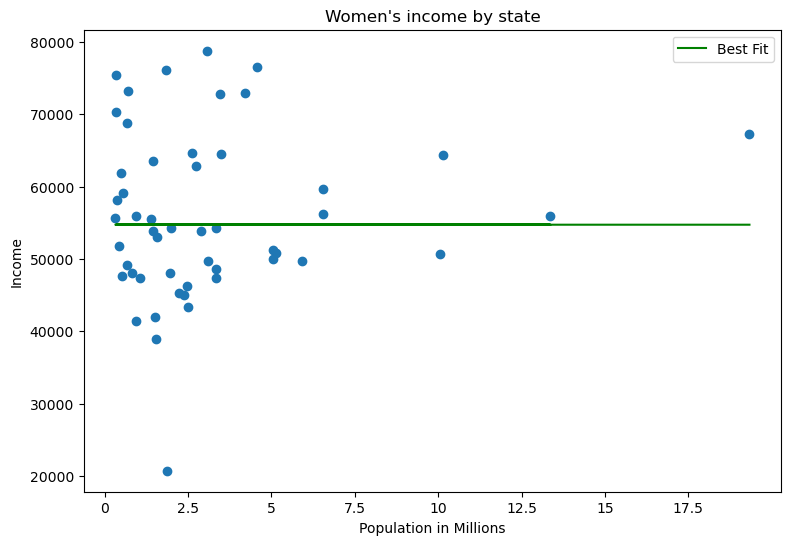

<Figure size 640x480 with 0 Axes>

In [46]:
plt.figure(figsize = [9, 6])
plt.scatter(states['Women'], states['Income'])
plt.title('Women\'s income by state')
plt.xlabel('Population in Millions')
plt.ylabel('Income')
plt.xticks(
    [0, 2500000, 5000000, 7500000, 10000000, 12500000, 15000000, 17500000], 
    labels = [0, 2.5, 5, 7.5, 10, 12.5, 15, 17.5]
)
plt.plot(states['Women'], 
         results.params[1] * results.predict(states['Women']) + results.params[0], 
         color = 'green', 
         label = 'Best Fit Line'
        )
plt.legend()
plt.show()
plt.clf()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [35]:
print(states.columns)

Index(['State', 'TotalPop', 'Hispanic', 'White', 'Black', 'Native', 'Asian',
       'Pacific', 'Income', 'Men', 'Women'],
      dtype='object')


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [37]:
print(states.isnull().sum())

State       0
TotalPop    0
Hispanic    0
White       0
Black       0
Native      0
Asian       0
Pacific     4
Income      0
Men         0
Women       0
dtype: int64


In [38]:
for col in ['Hispanic', 'White', 'Black', 'Native', 'Asian']:
    states[col] = states[col].str.replace('%', '')
for col in ['Hispanic', 'White', 'Black', 'Native', 'Asian']:
    states[col] = pd.to_numeric(states[col], errors='coerce')
print(states[states.Pacific.isnull()], states.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 4
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     51 non-null     object 
 1   TotalPop  51 non-null     int64  
 2   Hispanic  51 non-null     float64
 3   White     51 non-null     float64
 4   Black     51 non-null     float64
 5   Native    51 non-null     float64
 6   Asian     51 non-null     float64
 7   Pacific   47 non-null     object 
 8   Income    51 non-null     float64
 9   Men       51 non-null     int64  
 10  Women     51 non-null     float64
dtypes: float64(7), int64(2), object(2)
memory usage: 4.8+ KB
          State  TotalPop  Hispanic  White  Black  Native  Asian Pacific  \
4  North Dakota    721640      2.83  87.45   1.28    5.65   0.96     NaN   
1        Kansas   2892987     11.64  75.96   6.57    0.73   2.33     NaN   
0      Colorado   5278906     20.78  69.90   3.55    0.57   2.66     NaN   
2      Delaware    926454     

In [39]:
states['Pacific'] = states['Pacific'].str.replace('%', '')
states['Pacific'] = pd.to_numeric(states['Pacific'], errors='coerce')
states['Pacific'] = states['Pacific'].fillna(
    100 - sum(states[x] for x in ['Hispanic', 'White', 'Black', 'Native', 'Asian'])
)
print(states.info())
print(states[states['State'] == 'Kansas']) #check previous nan filled
print(states[states['State'] == 'Nebraska']) #random 

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 0 to 4
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   State     51 non-null     object 
 1   TotalPop  51 non-null     int64  
 2   Hispanic  51 non-null     float64
 3   White     51 non-null     float64
 4   Black     51 non-null     float64
 5   Native    51 non-null     float64
 6   Asian     51 non-null     float64
 7   Pacific   51 non-null     float64
 8   Income    51 non-null     float64
 9   Men       51 non-null     int64  
 10  Women     51 non-null     float64
dtypes: float64(8), int64(2), object(1)
memory usage: 4.8+ KB
None
    State  TotalPop  Hispanic  White  Black  Native  Asian  Pacific    Income  \
1  Kansas   2892987     11.64  75.96   6.57    0.73   2.33     2.77  53885.61   

       Men      Women  
1  1439862  1453125.0  
      State  TotalPop  Hispanic  White  Black  Native  Asian  Pacific  \
2  Nebraska   1869365       9.2  81.14   4.96

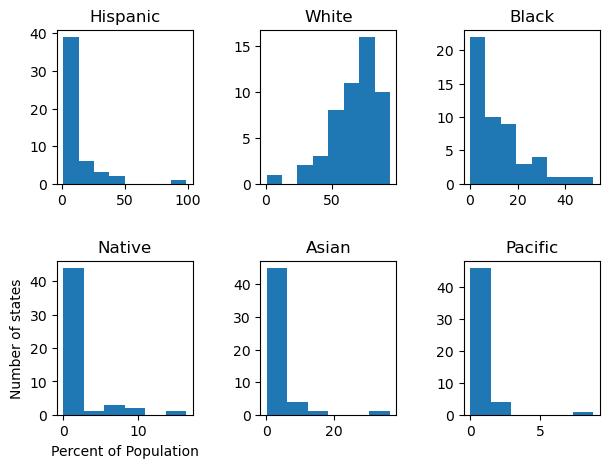

<Figure size 640x480 with 0 Axes>

In [40]:
plt.figure(figsize = [7 , 5])
plt.subplot(2, 3, 1)
plt.subplots_adjust(wspace = .5, hspace = .5)
plt.hist(states['Hispanic'], bins = 8)
plt.title('Hispanic')
plt.subplot(2, 3, 2)
plt.hist(states['White'], bins = 8)
plt.title('White')
plt.subplot(2, 3, 3)
plt.hist(states['Black'], bins = 8)
plt.title('Black')
plt.subplot(2, 3, 4)
plt.hist(states['Native'], bins = 6)
plt.title('Native')
plt.ylabel('Number of states')
plt.xlabel('Percent of Population')
plt.subplot(2, 3, 5)
plt.hist(states['Asian'], bins = 8)
plt.title('Asian')
plt.subplot(2, 3, 6)
plt.hist(states['Pacific'], bins = 8)
plt.title('Pacific')
plt.show()
plt.clf()